## Importing Libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Data Preprocessing

## Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory('train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    )

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[189.   181.   179.  ]
   [188.25 180.25 178.25]
   [190.75 182.75 180.75]
   ...
   [196.5  188.5  186.5 ]
   [196.25 188.25 186.25]
   [195.25 187.25 185.25]]

  [[188.   180.   178.  ]
   [190.25 182.25 180.25]
   [190.5  182.5  180.5 ]
   ...
   [184.   176.   174.  ]
   [191.25 183.25 181.25]
   [186.5  178.5  176.5 ]]

  [[190.25 182.25 180.25]
   [193.75 185.75 183.75]
   [193.5  185.5  183.5 ]
   ...
   [189.75 181.75 179.75]
   [185.   177.   175.  ]
   [183.75 175.75 173.75]]

  ...

  [[178.5  168.5  166.5 ]
   [184.25 174.25 172.25]
   [186.75 176.75 174.75]
   ...
   [179.75 169.75 167.75]
   [179.75 169.75 167.75]
   [180.75 170.75 168.75]]

  [[181.   171.   169.  ]
   [182.5  172.5  170.5 ]
   [178.5  168.5  166.5 ]
   ...
   [177.   167.   165.  ]
   [175.5  165.5  163.5 ]
   [180.5  170.5  168.5 ]]

  [[183.25 173.25 171.25]
   [181.75 171.75 169.75]
   [182.5  172.5  170.5 ]
   ...
   [185.5  175.5  173.5 ]
   [171.   161.   159.  ]
   [173.   163.   16

## To avoid overshooting
1. Choose small learning rate default being 0.001, we can take 0.0001
2. There may be chances of underfitting, so increase the the number of neuron.
3. Add more Convolution layer to extract more features from images may be possibility  

## Building Model

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential


In [11]:
model = Sequential()

In [12]:
#Building convolution layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\anura\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) # to avoid overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [22]:
model.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

## Model Training

In [23]:
training_history= model.fit(x = training_set, validation_data =validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1631s 740ms/step - accuracy: 0.3699 - loss: 2.2481 - val_accuracy: 0.8303 - val_loss: 0.5323
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1706s 777ms/step - accuracy: 0.8295 - loss: 0.5388 - val_accuracy: 0.9153 - val_loss: 0.2679
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1828s 832ms/step - accuracy: 0.9042 - loss: 0.3002 - val_accuracy: 0.9253 - val_loss: 0.2354
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1512s 688ms/step - accuracy: 0.9351 - loss: 0.2001 - val_accuracy: 0.9452 - val_loss: 0.1671
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1515s 689ms/step - accuracy: 0.9509 - loss: 0.1525 - val_accuracy: 0.9503 - val_loss: 0.1524
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1603s 730ms/step - accuracy: 0.9628 - loss: 0.1111 - val_accuracy: 0.9586 - val_loss: 0.1327
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1631s 742ms/step - accuracy: 0.9711 - loss: 0.0887 - val_accuracy: 0.9463 - val_loss: 0.1748
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1525s 694ms/s

## Model Evaluation

In [24]:
#model Evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 358s 163ms/step - accuracy: 0.9908 - loss: 0.0278


In [25]:
train_loss, train_acc 

(0.02551477961242199, 0.9912511706352234)

In [26]:
#model Evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.9710 - loss: 0.0990


In [27]:
print(val_loss, val_acc)

0.1014183908700943 0.9694400429725647


## Saving Model

In [28]:
model.save("trained_model.h5")

In [30]:
model.save("trained_model.keras")

In [31]:
print(training_history.history)

{'accuracy': [0.5793583989143372, 0.8552244305610657, 0.913976788520813, 0.9408634901046753, 0.9544917941093445, 0.9647769927978516, 0.9714773297309875, 0.9752471446990967, 0.9797567129135132, 0.981022834777832], 'loss': [1.4317930936813354, 0.45510414242744446, 0.2693881392478943, 0.18090876936912537, 0.14046578109264374, 0.10631131380796432, 0.08714618533849716, 0.07451020926237106, 0.06404121965169907, 0.05664989724755287], 'val_accuracy': [0.8302981853485107, 0.9152629375457764, 0.9253357648849487, 0.9451969265937805, 0.9503186941146851, 0.9585704803466797, 0.9462781548500061, 0.9508877992630005, 0.9719439744949341, 0.9694400429725647], 'val_loss': [0.5322579145431519, 0.26786932349205017, 0.23537325859069824, 0.16706137359142303, 0.15241152048110962, 0.1326572448015213, 0.17480811476707458, 0.16620062291622162, 0.0983358696103096, 0.10141833126544952]}


In [32]:
#Recording history in json
import json
with open("trained_history.json", "w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

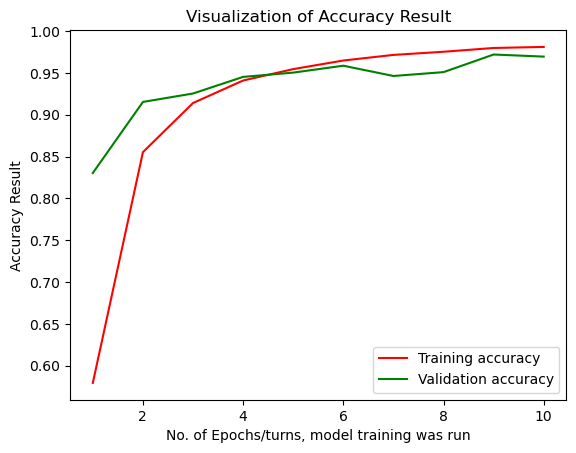

In [48]:
epochs= [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color= 'red',label= 'Training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color= 'green', label= 'Validation accuracy')
plt.xlabel("No. of Epochs/turns, model training was run")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [49]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [51]:
y_pred= model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 96s 174ms/step


(array([[9.99999166e-01, 1.44795518e-08, 1.33929659e-10, ...,
         2.23936234e-12, 3.21172533e-11, 3.14489892e-11],
        [9.99999404e-01, 1.04978204e-09, 4.70256716e-11, ...,
         8.88116502e-15, 6.42428276e-13, 1.80301011e-12],
        [1.00000000e+00, 1.05410851e-13, 9.16179105e-16, ...,
         5.49768986e-20, 4.12104653e-15, 1.07780178e-17],
        ...,
        [1.89360492e-07, 4.77317574e-10, 6.99516178e-08, ...,
         8.90882978e-10, 1.76518189e-09, 9.99994278e-01],
        [1.98286596e-08, 1.11367365e-11, 3.97406819e-09, ...,
         5.35509796e-11, 4.21436705e-11, 9.99999762e-01],
        [1.58148251e-11, 7.08655343e-14, 4.77072917e-13, ...,
         1.94966828e-16, 6.29076869e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [52]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [53]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [54]:
true_categories= tf.concat([y for x,y in test_set], axis=0)

In [55]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [56]:
Y_true= tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

 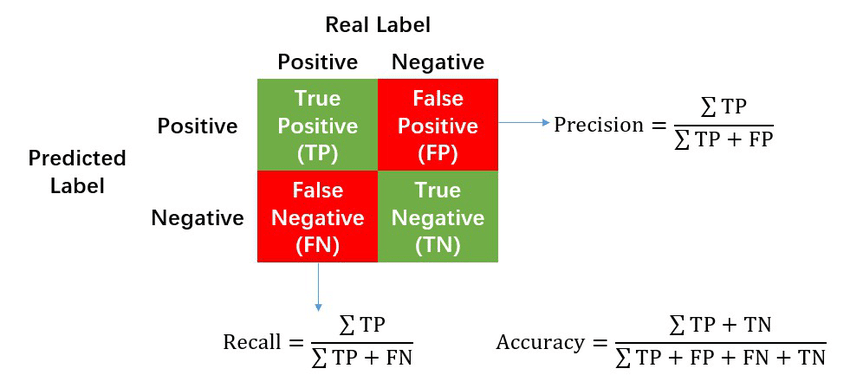

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(Y_true, predicted_categories, target_names= class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.97       504
                                 Apple___Black_rot       0.97      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.95      0.92       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.91      0.

In [64]:
cm = confusion_matrix(Y_true, predicted_categories)
cm, cm.shape

(array([[491,   5,   0, ...,   0,   0,   0],
        [  0, 495,   0, ...,   0,   0,   0],
        [  0,   0, 432, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 482,   0,   0],
        [  0,   0,   0, ...,   0, 448,   0],
        [  1,   0,   2, ...,   0,   0, 473]], dtype=int64),
 (38, 38))

## Visualising the Confusion Matrix

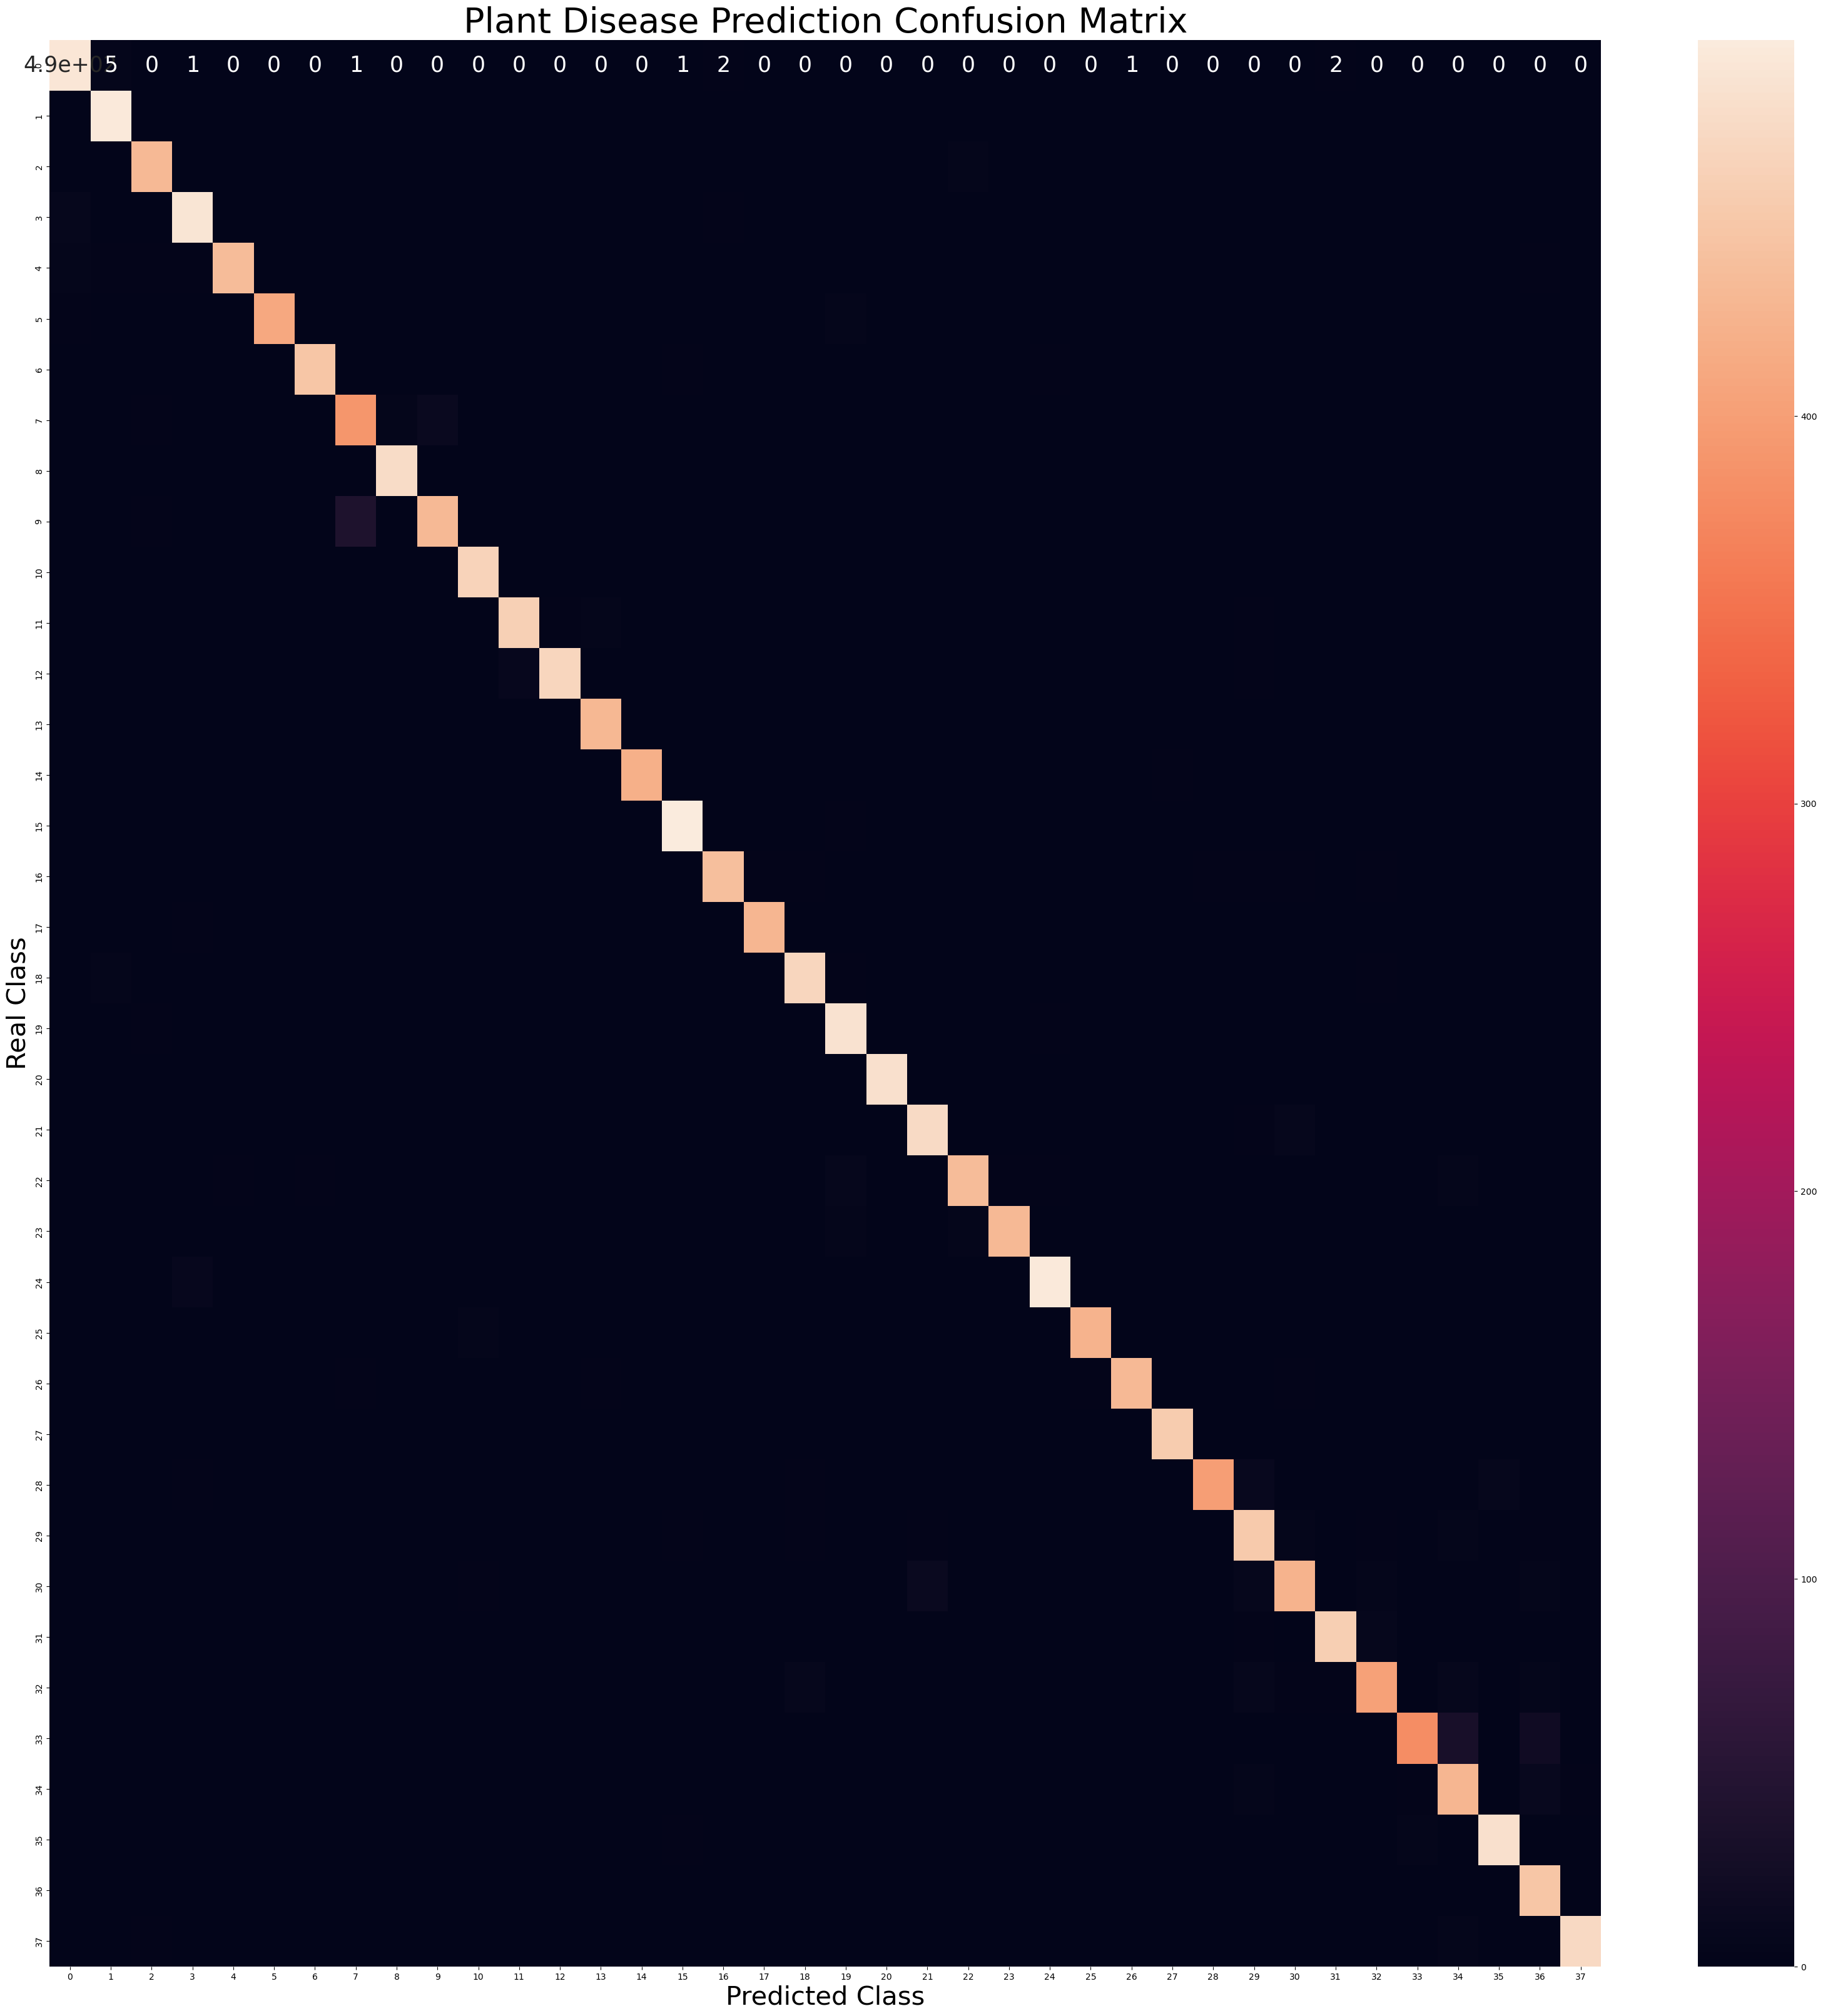

In [74]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot= True, annot_kws= {'size':25})
plt.xlabel("Predicted Class", fontsize= 30)
plt.ylabel("Real Class", fontsize= 30)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=40)
plt.show()